<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Earthquake_Alert_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahmeduzaki/earthquake-alert-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'earthquake-alert-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/earthquake-alert-prediction-dataset


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(path + "/earthquake_alert_balanced_dataset.csv")
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


**Data Analysis and Exploration**

In [5]:
df.shape

(1300, 6)

In [6]:
df['alert'].value_counts()

,count
alert,
green,325
yellow,325
orange,325
red,325


In [7]:
df.isnull().sum()

,0
magnitude,0
depth,0
cdi,0
mmi,0
sig,0
alert,0


In [14]:
display(df.describe())

,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


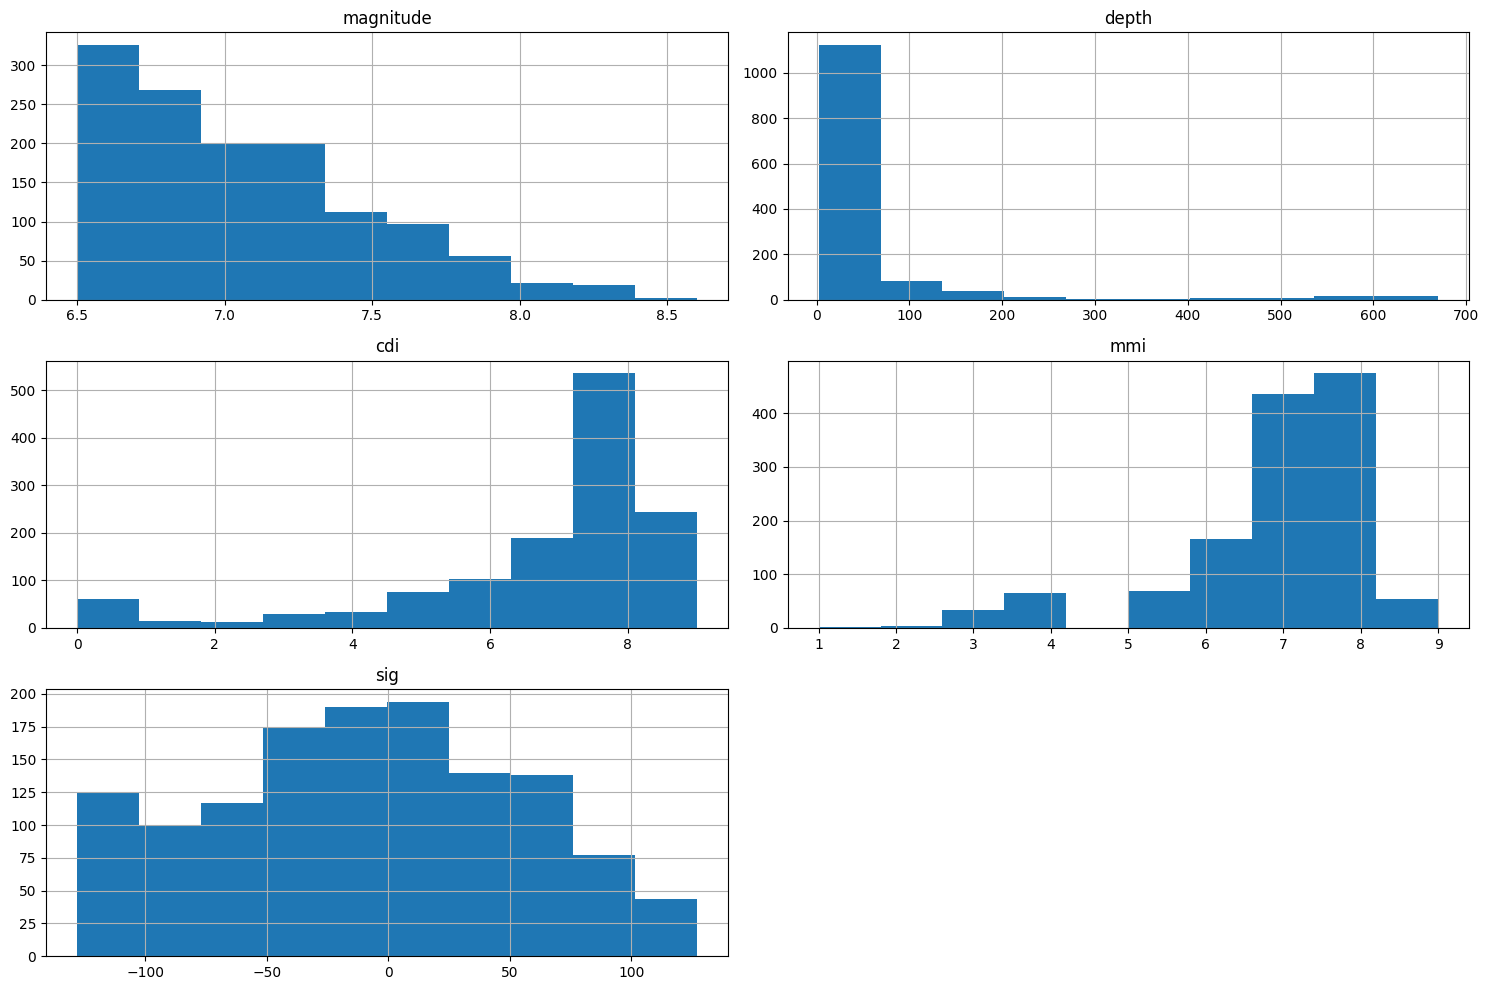

In [15]:
numerical_features = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
df[numerical_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

/tmp/ipython-input-887219196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='alert', data=df, palette='viridis')


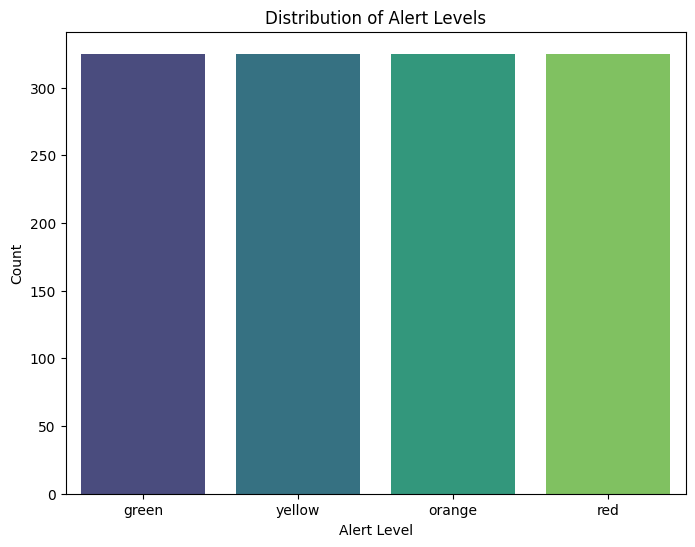

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='alert', data=df, palette='viridis')
plt.title('Distribution of Alert Levels')
plt.xlabel('Alert Level')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-638757060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alert', y=feature, data=df, palette='viridis')


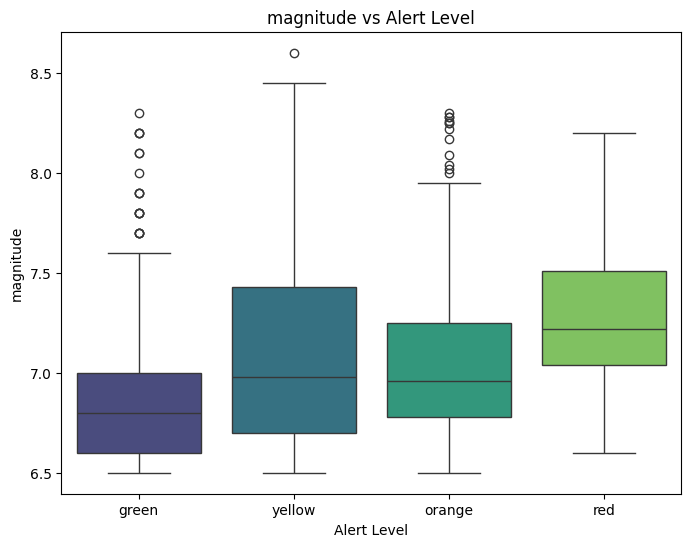

/tmp/ipython-input-638757060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alert', y=feature, data=df, palette='viridis')


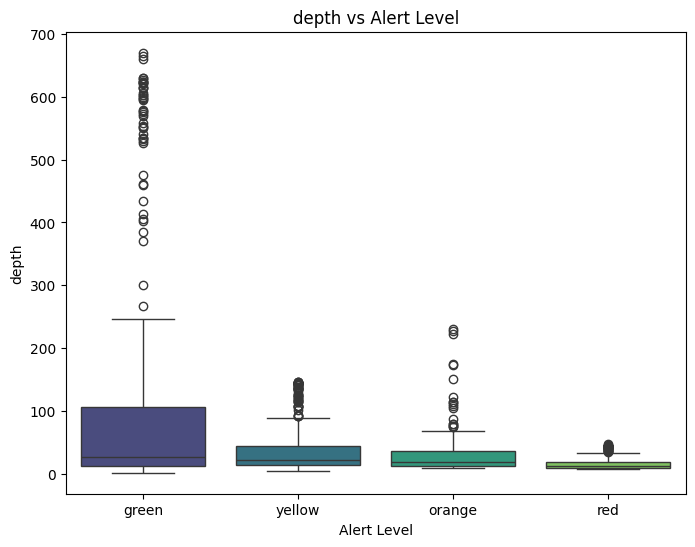

/tmp/ipython-input-638757060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alert', y=feature, data=df, palette='viridis')


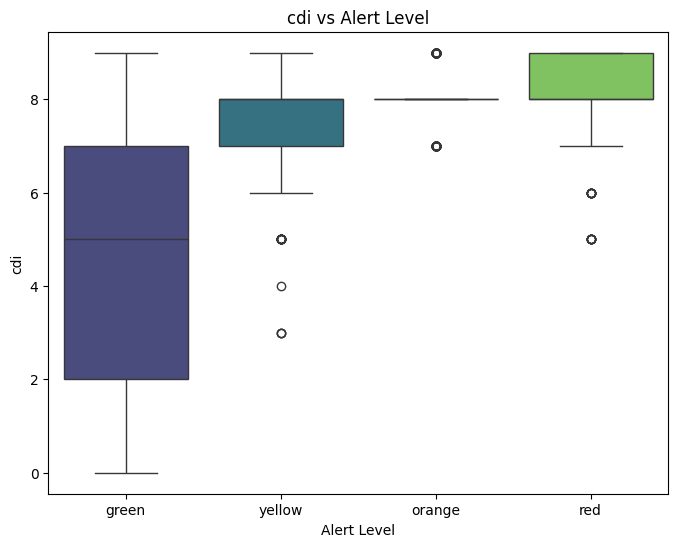

/tmp/ipython-input-638757060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alert', y=feature, data=df, palette='viridis')


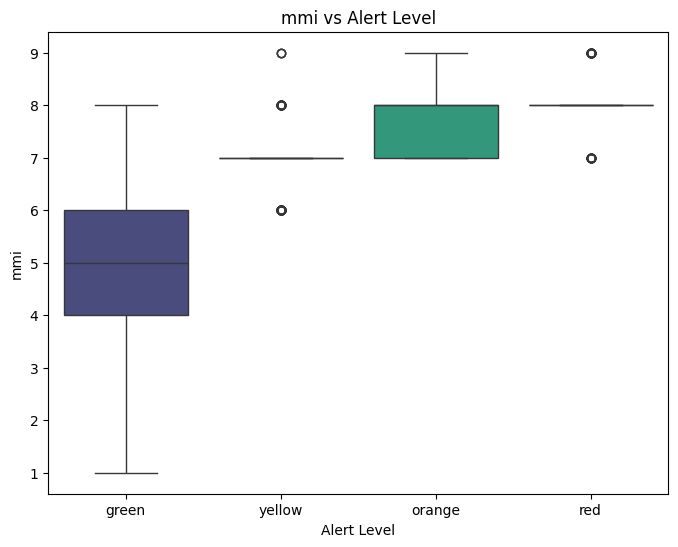

/tmp/ipython-input-638757060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='alert', y=feature, data=df, palette='viridis')


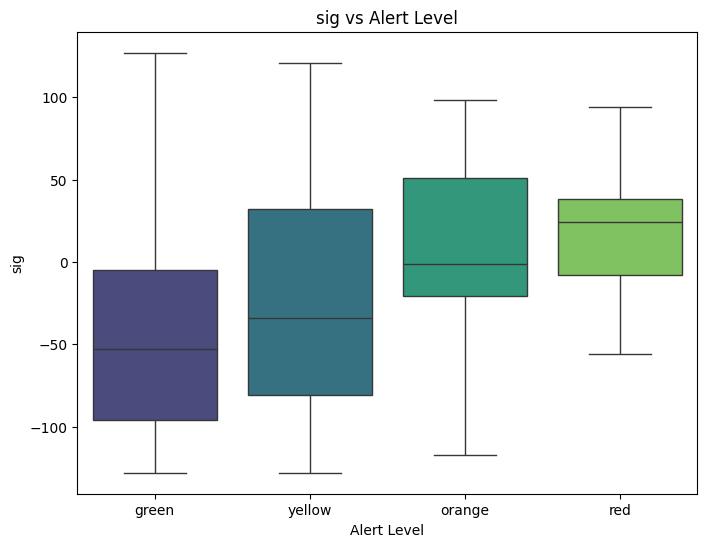

In [17]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='alert', y=feature, data=df, palette='viridis')
    plt.title(f'{feature} vs Alert Level')
    plt.xlabel('Alert Level')
    plt.ylabel(feature)
    plt.show()

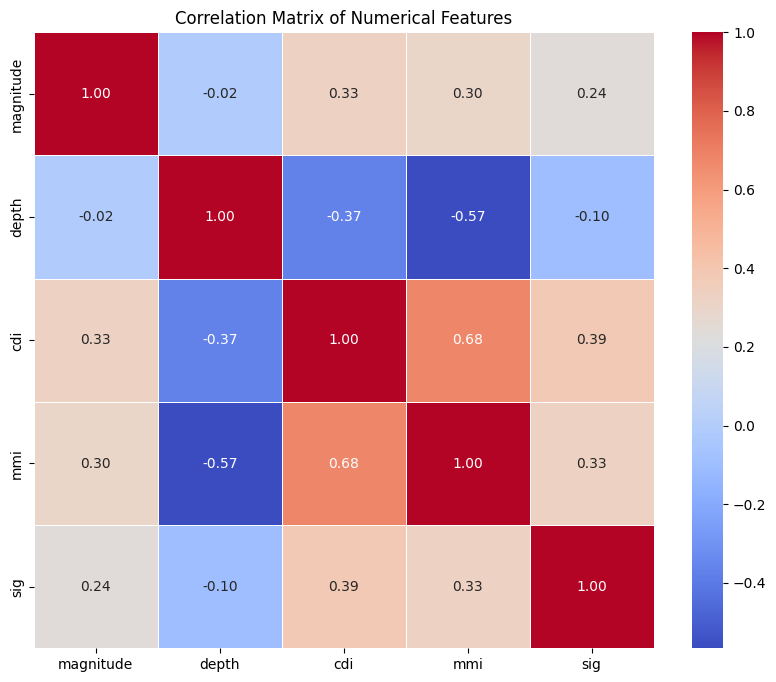

In [9]:
# 4. Correlation matrix/heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Splitting the data into Target and Features**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features (X) and target (y)
X = df.drop('alert', axis=1)
y = df['alert']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing steps
X_processed = preprocessor.fit_transform(X)

# Display the shape of the processed features
print("Shape of processed features:", X_processed.shape)

Shape of processed features: (1300, 5)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1040, 5)
Shape of X_test: (260, 5)
Shape of y_train: (1040,)
Shape of y_test: (260,)


**Model Training**

In [12]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train KMeans model
kmeans = KMeans(n_clusters=len(y_train.unique()), random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X_train)

# Train classification models
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42)

logistic_regression_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

SVC(random_state=42)

**Model Evaluation**

In [13]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Evaluate K-Means performance
# Find the dominant alert label in each cluster for the training data
train_labels = pd.DataFrame({'cluster': kmeans.labels_, 'alert': y_train})
cluster_alert_mapping = train_labels.groupby('cluster')['alert'].agg(lambda x: x.mode()[0]).to_dict()

# Predict cluster labels for the test data
kmeans_test_clusters = kmeans.predict(X_test)

# Map the predicted clusters to alert labels using the mapping derived from the training data
kmeans_predictions = pd.Series(kmeans_test_clusters).map(cluster_alert_mapping)

# Calculate accuracy for K-Means (by mapping clusters to known labels)
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)

# Evaluate classification models
logistic_regression_predictions = logistic_regression_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
svc_accuracy = accuracy_score(y_test, svc_predictions)

# Print the accuracy scores
print(f"K-Means (mapped) Accuracy: {kmeans_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {logistic_regression_accuracy:.4f}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.4f}")
print(f"Random Forest Accuracy: {random_forest_accuracy:.4f}")
print(f"SVC Accuracy: {svc_accuracy:.4f}")

K-Means (mapped) Accuracy: 0.5423
Logistic Regression Accuracy: 0.6154
Decision Tree Accuracy: 0.8846
Random Forest Accuracy: 0.9115
SVC Accuracy: 0.7923
